# KMeans Cluster in Python

## Module Setup

We begin by loading the modules that we need

In [ ]:
import pandas as pd 
from pydataset import data 
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt

## Data preparation

We are using the sat.act dataset from pydataset. We take a look at it below and remove in NA values for simplicity.

In [81]:
df=data("sat.act")
df=df.dropna(how='any')
df.head()

,gender,education,age,ACT,SATV,SATQ
29442,2,3,19,24,500,500.0
29457,2,3,23,35,600,500.0
29498,2,3,20,21,480,470.0
29503,1,4,27,26,550,520.0
29504,1,2,33,31,600,550.0


## Determine the # of Clusters

It is difficult to determine how many clusters to use for the analysis. However, there are several different ways to approach this. One way si with the elbow method. The Elbow Method uses the sum of squares distance as it runs multiple models with multiple number of clusters. The optimal number of clusters is where there is a break or noticeable decline in the slope of the amount of sum of square distance. 

In [82]:
distortions = [] 
K = range(1,10) # number of clusters
for k in K: 
    kmeanModel = KMeans(n_clusters=k).fit(df) 
    distortions.append(sum(np.min(cdist(df, 
                                        kmeanModel.cluster_centers_, 'euclidean'), 
                                  axis=1)) / df.shape[0])
print(distortions)

[138.75344536281915, 96.14871298193118, 78.39348578184507, 71.24402967704194, 65.50262047491178, 60.21264280285935, 55.545519487977835, 52.440408431413104, 49.16451199139724]


Plot the results

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

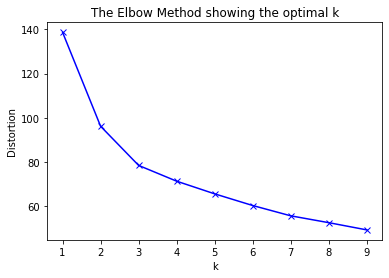

In [83]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method showing the optimal k')

It appears that 3 clusters should be enough for this analysis.

## Create KMeans Clusters

We now will create our Kmeans model with three clusters

In [84]:
km = KMeans(3,init='k-means++',random_state=3425) 
km.fit(df.values)

KMeans(n_clusters=3, random_state=3425)

### Descriptive Stats

We will now predict with our kmeans model and take a look at our dataset again

In [85]:
df['predict']=km.predict(df.values)
df[:5]

,gender,education,age,ACT,SATV,SATQ,predict
29442,2,3,19,24,500,500.0,2
29457,2,3,23,35,600,500.0,0
29498,2,3,20,21,480,470.0,2
29503,1,4,27,26,550,520.0,0
29504,1,2,33,31,600,550.0,0


Is desciptives by various groups 

In [86]:
print(df.groupby('predict').ACT.mean())
print(df.groupby('predict').age.mean())
print(df.groupby('predict').SATV.mean())
print(df.groupby('predict').SATQ.mean())
print(df.groupby('predict').education.mean())

predict
0    27.531136
1    31.547945
2    23.655738
Name: ACT, dtype: float64
predict
0    26.761905
1    24.921233
2    24.852459
Name: age, dtype: float64
predict
0    590.391941
1    703.202055
2    443.950820
Name: SATV, dtype: float64
predict
0    582.963370
1    705.520548
2    443.098361
Name: SATQ, dtype: float64
predict
0    3.336996
1    3.164384
2    2.819672
Name: education, dtype: float64


### Visualization

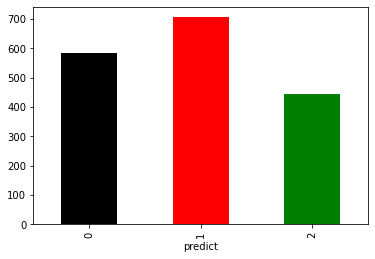

In [90]:
(df.groupby('predict').SATQ.mean()).plot(kind='bar',color=['black', 'red', 'green'])

### By Gender

In [91]:
print(pd.crosstab(df['predict'],df['gender']))

gender     1    2
predict          
0         83  190
1        119  173
2         43   79


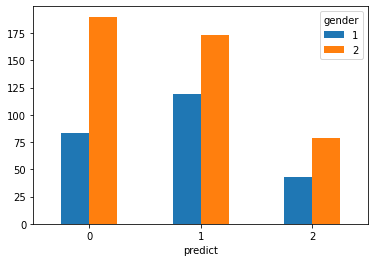

In [92]:
crosstb = pd.crosstab(df['predict'],df['gender'])
# Creating barplot
barplot = crosstb.plot.bar(rot=0)

### By Education

In [93]:
print(pd.crosstab(df['predict'],df['education']))

education   0   1   2    3   4   5
predict                           
0          18  14  16   99  62  64
1          25  18  15  120  54  60
2          13  11  12   50  21  15


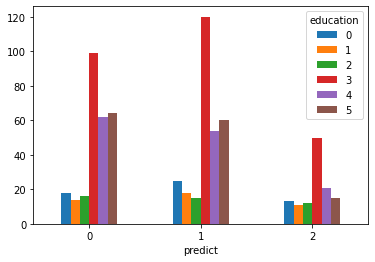

In [94]:
crosstb = pd.crosstab(df['predict'],df['education'])
# Creating barplot
barplot = crosstb.plot.bar(rot=0)

## Visual of Clusters

For interpretation we need to give each of our clusters a name. We do this by mapping the values as shown below.

In [95]:
clust_map={2:'Weak',0:'Average',1:'Strong'} 
df['perf']=df.predict.map(clust_map)
df.head()

,gender,education,age,ACT,SATV,SATQ,predict,perf
29442,2,3,19,24,500,500.0,2,Weak
29457,2,3,23,35,600,500.0,0,Average
29498,2,3,20,21,480,470.0,2,Weak
29503,1,4,27,26,550,520.0,0,Average
29504,1,2,33,31,600,550.0,0,Average


In [96]:
d_color={'Weak':'g','Average':'y','Strong':'r'}
d_color

{'Weak': 'g', 'Average': 'y', 'Strong': 'r'}

Next, we give each group a color

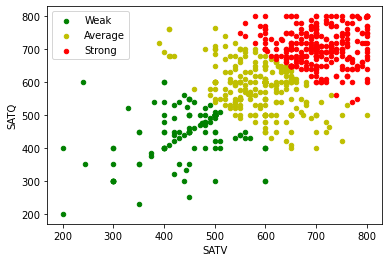

In [99]:
fig, ax=plt.subplots()
for clust in clust_map.values():
    color=d_color[clust]
    df[df.perf==clust].plot(kind='scatter',x='SATV',y='SATQ', label=clust,ax=ax,color=color)

Below is the visualization use sat and act scores for the plots